<a href="https://colab.research.google.com/github/ajayn3300/Bank-Marketing-Effectiveness-Prediction---Classification/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# further needed libraries will be imported as per need

In [3]:
# data import
data=pd.read_csv('/content/drive/MyDrive/Copy of bank-full.csv',sep=';')

In [4]:
#data sample
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6567,38,entrepreneur,married,secondary,no,2849,yes,no,unknown,28,may,166,3,-1,0,unknown,no
41328,34,technician,single,tertiary,no,612,no,no,cellular,28,aug,81,1,95,1,failure,no
39092,27,blue-collar,single,secondary,no,381,yes,no,cellular,18,may,143,1,-1,0,unknown,no
44713,27,management,single,tertiary,no,592,no,no,cellular,7,sep,667,1,221,3,failure,no
16233,49,services,married,secondary,no,702,no,yes,cellular,23,jul,194,1,-1,0,unknown,no


In [5]:
# data shape
data.shape

(45211, 17)

In [6]:
#numeric features
len(data.describe().columns)

7

In [7]:
# categorical features
len(data.describe(include='object').columns)

10

In [8]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#data description
data.describe([0.25,0.5,0.75,0.9,0.95])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
90%,56.000000,3574.000000,28.000000,548.000000,5.000000,185.000000,2.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Wrangling


In [10]:
# Null values
data.isna().sum()    

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
# duplicated
data.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

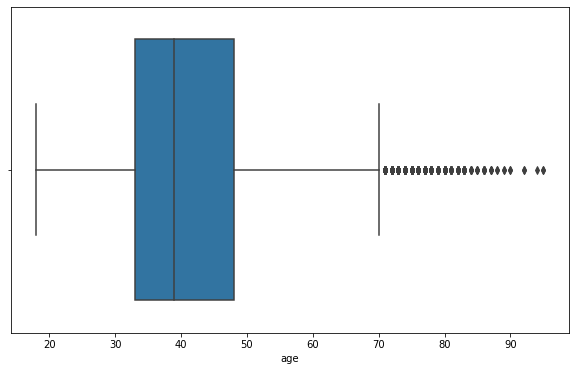

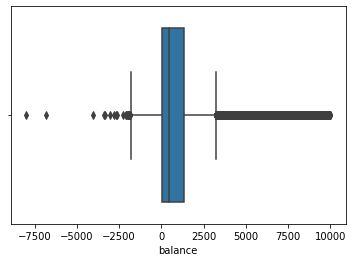

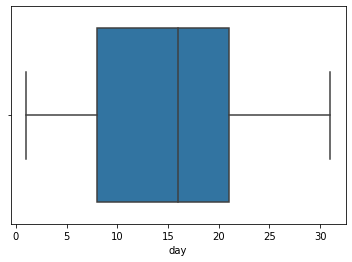

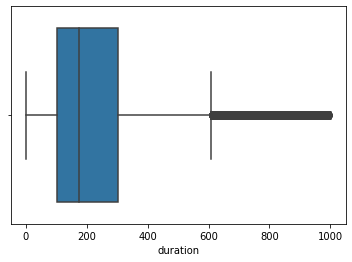

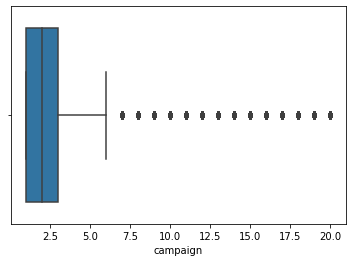

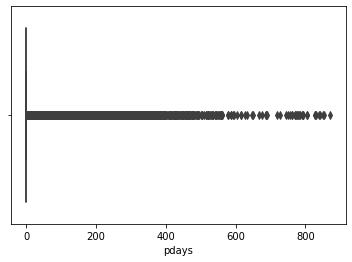

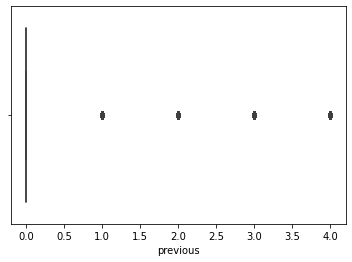

In [29]:
#outliers
plt.figure(figsize=(10,6))
for i,j in enumerate(data.describe().columns):
  plt.figure(i+1)
  sns.boxplot(data[j])

In [14]:
# let's remove balance more than 10000
data=data[data['balance']<10000]

In [17]:
# duration less than 100
data=data[data['duration']<=1000]

In [23]:
# campaign less than equal to 20
data=data[data['campaign']<=20]

In [28]:
# removing outliers from previous variable

data=data[data['previous']<5]

      All good ! 

In [33]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


# **EDA**

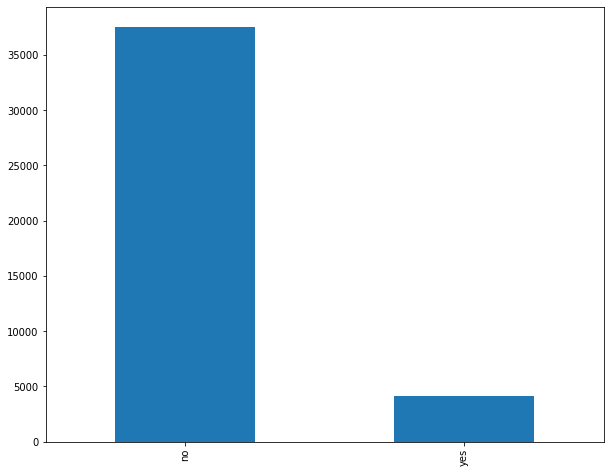

In [43]:
# let;s plot our  dependent variable first
plt.figure(figsize=(10,8))
data.y.value_counts().plot(kind='bar')


      Ooops! we have imbalanced dataset,need sampling (over or under sampling)

In [45]:
#data sample
data.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
35212,27,services,married,secondary,no,58,yes,no,cellular,7,may,113,1,337,2,other,no
42283,56,retired,married,primary,no,9367,no,no,telephone,13,nov,271,2,92,4,success,yes
2383,26,blue-collar,single,secondary,no,309,yes,no,unknown,13,may,210,1,-1,0,unknown,no


Text(0.5, 0.98, 'Types of Jobs clients do ')

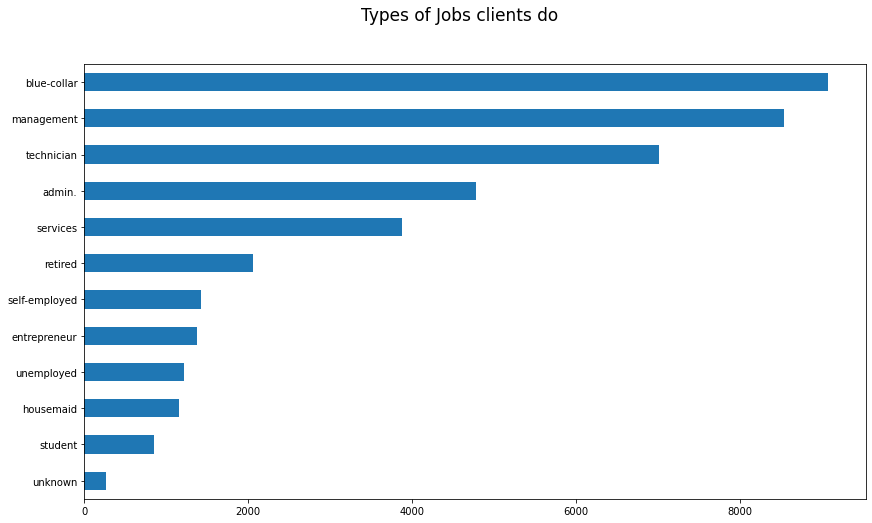

In [61]:
# no. and types of jobs
plt.figure(figsize=(14,8))
data.job.value_counts().sort_values().plot(kind='barh')
plt.suptitle('Types of Jobs clients do ',fontsize=17)

          Most numbers of clients have blue-collar job

Text(0.5, 0.98, "Client's Relationship Status")

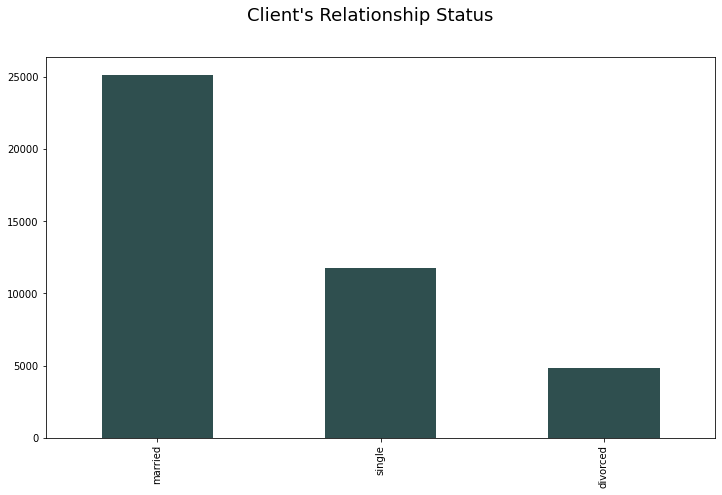

In [74]:
# Client's relationship status
plt.figure(figsize=(12,7))
data.marital.value_counts().plot(kind='bar',color='darkslategrey')
plt.suptitle("Client's Relationship Status",fontsize=18)

        Most numbers of clients are married!

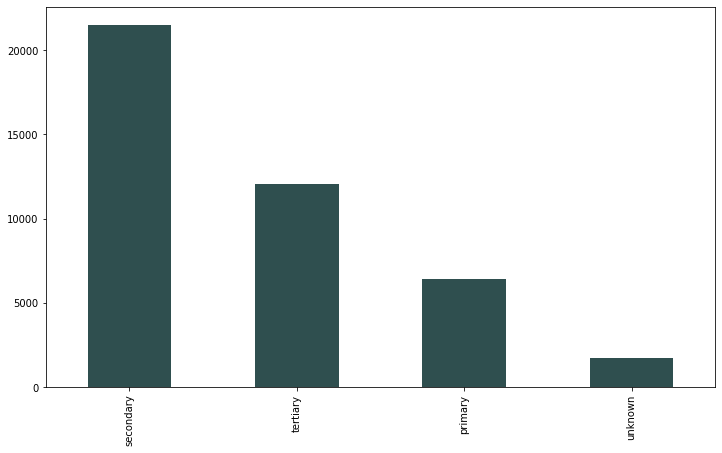

In [73]:
# Client's education level
plt.figure(figsize=(12,7))
data.education.value_counts().plot(kind='bar',color='darkslategrey')

Text(0.5, 0.98, 'Clients with Credit in Default')

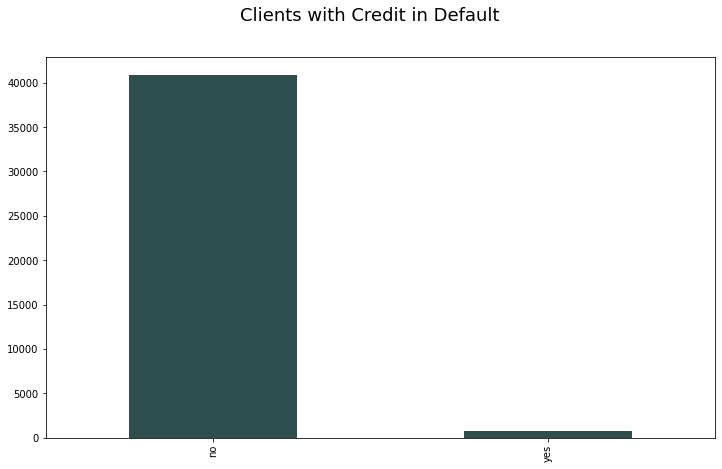

In [89]:
# no. of clients have credit in defalut
plt.figure(figsize=(12,7))
data.default.value_counts().plot(kind='bar',color='darkslategrey')
plt.suptitle('Clients with Credit in Default',fontsize=18)

Text(0.5, 0.98, 'Clients with Housing Loan')

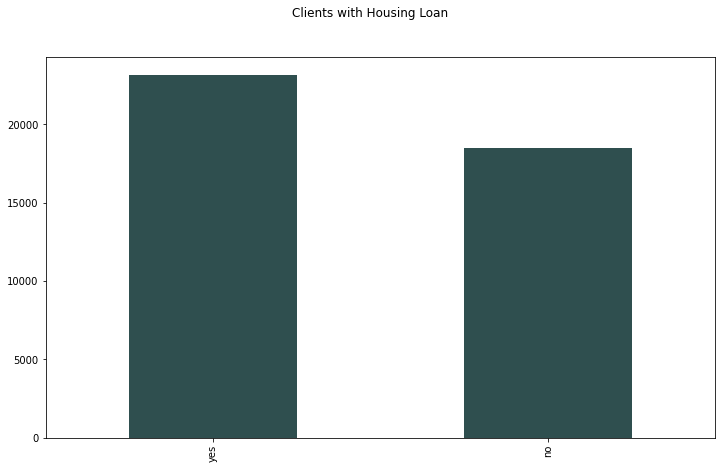

In [88]:
 # no. of clients having housing loans
plt.figure(figsize=(12,7))
data.housing.value_counts().plot(kind='bar',color='darkslategrey')
plt.suptitle('Clients with Housing Loan')

Text(0.5, 0.98, 'Clients with Personal Loan')

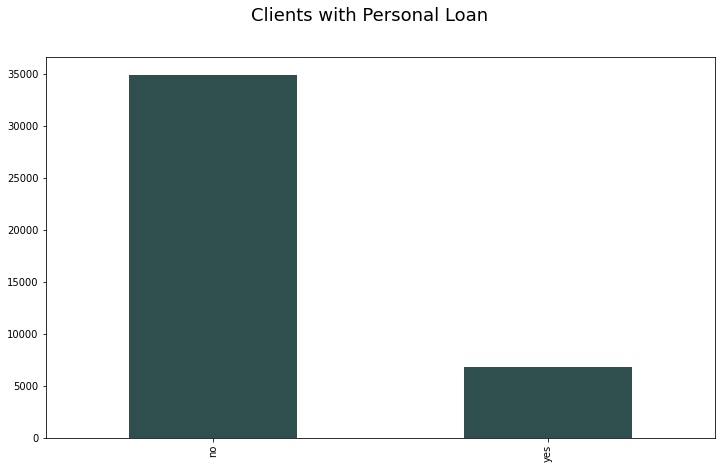

In [87]:
# clients who have personal loan
plt.figure(figsize=(12,7))
data.loan.value_counts().plot(kind='bar',color='darkslategrey')
plt.suptitle('Clients with Personal Loan',fontsize=18)

# **Feature Engineering** 

In [93]:
# Let's create a new dataframe
df=data

In [94]:
# features with categorical values
df.describe(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [95]:
# Features with only two values( so we could do label encoding)
binary_features=[i for i in df.columns if df[i].nunique()==2]
print(binary_features)

['default', 'housing', 'loan', 'y']


In [100]:
# label encoding
df.loc[:,binary_features].head(5)

,default,housing,loan,y
0,no,yes,no,no
1,no,yes,no,no
2,no,yes,yes,no
3,no,yes,no,no
4,no,no,no,no


        These features only have 'yes' and 'no',so we will change them into binary all at once. 

In [117]:
# Let's do label encoding
for i in binary_features:
  df[i]=df[i].apply(lambda x: 1 if x=='yes' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
# sample df
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14647,46,blue-collar,married,primary,0,174,0,1,cellular,15,jul,90,1,-1,0,unknown,0
15038,55,unemployed,divorced,secondary,0,79,1,0,cellular,17,jul,418,2,-1,0,unknown,0
23548,46,management,married,tertiary,0,-3,0,0,cellular,28,aug,205,2,-1,0,unknown,0


In [125]:
# features with categorical values
for i in data.describe(include='object').columns:
  print('unique values in {} are : {}'.format(i,df[i].nunique()))

unique values in job are : 12
unique values in marital are : 3
unique values in education are : 4
unique values in contact are : 3
unique values in month are : 12
unique values in poutcome are : 4


      As we can see marital and contact have only 3 unique values so we can do label encoding in these features as well

In [135]:
# Label encoding in column :marital 

# Let's create a function for both columns
def label_encoder(x):
  if x=='married' or x=='cellular':
    return 1
  elif x=='divorced' or x=='telephone':
    return 2
  else:
     return 0

# Label encoding
for i in ['marital','contact']:
  df[i]=df[i].apply(label_encoder)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [137]:
#df sample
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37107,39,blue-collar,1,secondary,0,462,1,0,1,13,may,590,1,-1,0,unknown,1
37373,31,blue-collar,1,secondary,0,295,1,1,1,13,may,193,3,344,1,other,0
11154,58,unknown,1,unknown,0,219,0,0,0,18,jun,55,1,-1,0,unknown,0


In [144]:
# remaining categorical features
for i df.describe(include='object').columns

Index(['job', 'education', 'month', 'poutcome'], dtype='object')

      Now these categorical features have more than 2 or 3 unique values ,so we will do hot encoding here instead of label encoding 

In [145]:
# hot_encoding for : 
#job
df=df.join(pd.get_dummies(df.job,prefix='job'))

# education
df=df.join(pd.get_dummies(df.education,prefix='education'))

#month
df=df.join(pd.get_dummies(df.month))

# poutcome
df=df.join(pd.get_dummies(df.poutcome,prefix='poutcome'))



In [146]:
# data sample
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,jun,mar,may,nov,oct,sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
18831,41,management,1,tertiary,0,3348,0,0,1,4,...,0,0,0,0,0,0,0,0,0,1
20074,31,admin.,1,tertiary,0,323,0,0,1,11,...,0,0,0,0,0,0,0,0,0,1
9023,37,blue-collar,1,primary,0,213,0,1,0,5,...,1,0,0,0,0,0,0,0,0,1
27960,30,admin.,0,secondary,0,732,1,0,1,28,...,0,0,0,0,0,0,1,0,0,0
34079,56,retired,1,primary,0,1947,0,0,1,30,...,0,0,0,0,0,0,0,0,0,1


In [147]:
df.describe()

,age,marital,default,balance,housing,loan,contact,day,duration,campaign,...,jun,mar,may,nov,oct,sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,...,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000,41641.000000
mean,40.863692,0.834106,0.018828,1056.756442,0.555630,0.162868,0.763286,15.832641,232.755457,2.632526,...,0.119426,0.010182,0.308326,0.084484,0.014793,0.011527,0.095891,0.031603,0.027545,0.844960
std,10.556927,0.608142,0.135917,1672.371228,0.496902,0.369250,0.552040,8.329967,187.284787,2.485264,...,0.324293,0.100393,0.461808,0.278116,0.120725,0.106745,0.294445,0.174944,0.163667,0.361947
min,18.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,64.000000,0.000000,0.000000,0.000000,8.000000,102.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,1.000000,0.000000,421.000000,1.000000,0.000000,1.000000,16.000000,176.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1.000000,0.000000,1321.000000,1.000000,0.000000,1.000000,21.000000,304.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,2.000000,1.000000,9997.000000,1.000000,1.000000,2.000000,31.000000,1000.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
